# 実践問題3 Y=aX+b の期待値と分散

## (1) 確率変数Yの期待値と分散

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

In [0]:
n = 1000  # シミュレーションのサンプルサイズ
loc = 37/10
scale = 201/100
X = np.random.normal(loc=loc, scale=scale, size=n)

In [3]:
# Xの標本平均、標本分散、ヒストグラム
meanX = np.mean(X)
varX = np.var(X)
print('mean={}, var={}'.format(meanX, varX))

mean=3.6903925885502615, var=3.945495377052877


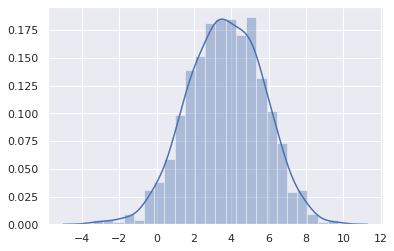

In [4]:
sns.distplot(X);

In [0]:
def qqplot(dist):
    stats.probplot(dist, dist="norm", plot=plt)
    plt.show()

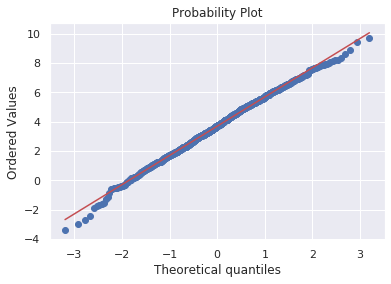

In [6]:
# 正規性を見るためのQ-Qプロット
qqplot(X)

In [7]:
# Yの標本平均、標本分散、ヒストグラム
Y = 10*(X-3)
meanY = np.mean(Y)
varY = np.var(Y)
print('mean={}, var={}'.format(meanY, varY))


mean=6.90392588550262, var=394.5495377052877


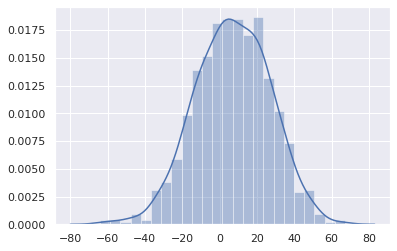

In [8]:
sns.distplot(Y);

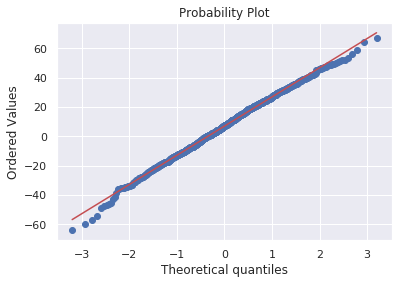

In [9]:
# 正規性を見るためのQ-Qプロット
qqplot(Y)

## (2) 確率変数Zの期待値と分散

In [0]:
# インタラクティブにグラフを描画するUIを作ってみる
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [0]:
def f(myu, sigma):
  Z = (X-myu)/sigma
  meanZ = np.mean(Z)
  varZ = np.var(Z)
  print('mean={}, var={}'.format(meanZ, varZ))

  plt.xlim(-10, 10)  
  plt.hist(Z)
  plt.show;
  return

In [37]:
interact(f, myu=(-7.0,7.0,0.1), sigma=(0.0,2.0,0.1));

interactive(children=(FloatSlider(value=0.0, description='myu', max=7.0, min=-7.0), FloatSlider(value=1.0, des…